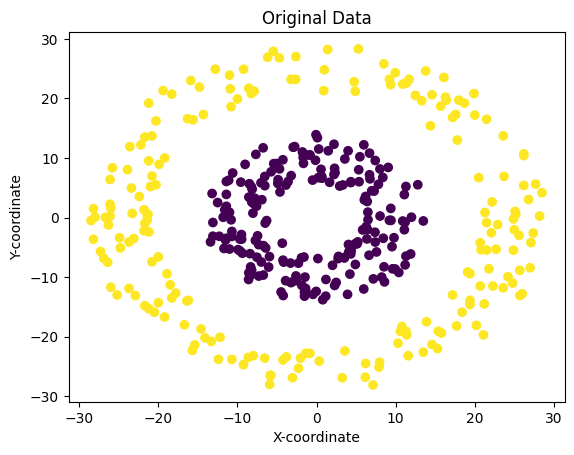

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# Load your data
data = np.genfromtxt("C:\\Users\\Ngugi\\OneDrive\\Pictures\\dataset_circles.csv", delimiter=',')
X = data[:, :2]  # Consider only the first two columns for x and y coordinates
y = data[:, 2]   # Third column for categories

# Visualize the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

# Self-written clustering method
# Here, we'll use the KMeans algorithm as an example
def custom_kmeans(X, n_clusters):
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]
    
    # Assign points to clusters
    while True:
        # Calculate distances to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        # Assign each point to the cluster of the closest centroid
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([np.mean(X[labels == k], axis=0) if np.sum(labels == k) > 0 else centroids[k] for k in range(n_clusters)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return labels, centroids

# Use the custom kMeans method
n_clusters_custom = 2  # You can change this value based on your dataset
labels_custom, centroids_custom = custom_kmeans(X, n_clusters_custom)

# Visualize the clustering result from self-written kMeans
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis')
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Custom kMeans Clustering")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.show()

# Transform the data and use scikit-learn kMeans
# You can experiment with different transformations based on your analysis
# For simplicity, we'll use StandardScaler here
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

# Apply kMeans on the transformed data
kmeans_sklearn = KMeans(n_clusters=n_clusters_custom)
labels_sklearn = kmeans_sklearn.fit_predict(X_transformed)

# Visualize the clustering result from scikit-learn kMeans
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis')
plt.scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Scikit-learn kMeans Clustering on Transformed Data")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.show()

# Explore other clustering methods (e.g., Agglomerative Clustering)
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters_custom)
labels_agg = agg_cluster.fit_predict(X)

# Visualize the clustering result from Agglomerative Clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()
